In [1]:
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100% !important; } </style>'))

# Gradient Ascent

The function findMaximum computes the maximum of the function <tt>f</tt> using the method of <font color="blue">gradient ascent</font>.  It is assumed that the function <tt>f</tt> is <font color="blue">convex</font> and  therefore there is only one global maximum.  The function takes the following arguments:
<ul>
    <li> <tt>f</tt>:  The function to minimize.  This function is expected to take one argument as its input.  This input is assumed to be a scalar or a  numpy vector and <tt>f</tt> returns a floating point number.</li>
<li> <tt>fGrad</tt>: The gradient of <tt>f</tt>.  This function takes one input that is is assumed to be a scalar or a numpy vector.</li>
<li> <tt>start</tt>: The value used to start the iteration.</li>
<li> <tt>eps</tt>: Precisison.  If the values of <tt>f</tt> change less than <tt>eps</tt>, then the algorithm stops.</li>
</ul> 

The function returns a triple of values of the form
$$ (x_{max}, \texttt{fx}, \texttt{cnt}) $$
<ol>
    <li>$x_{max}$ is the position  of the maximum,</li>
    <li>$\texttt{fx}$ is equal to $\texttt{f}(x_{max})$,</li>
    <li>$\texttt{cnt}$ is the number of iterations.</li>
</ol>

The algorithms computes a sequence $(x_n)_n$ that is defined inductively:
<ol>
    <li>$x_0 := \texttt{start}$,</li>
    <li>$x_{n+1} := x_n + \alpha \cdot \nabla f(x_n)$.</li>
</ol>

The algorithm given below adjusts the <font clor="blue">learning rate</font> $\alpha$ dynamically: If the $f(x_{n+1}) > f(x_n)$, then the learning rate alpha is increased by a factor of $1.2$.  Otherwise, the learning rate is decreased by a factor of $\frac{1}{2}$.  This way, the algorithm determines the optimal learning rate by itself.

In [2]:
def findMaximum(f, gradF, start, eps):
    x     = start
    fx    = f(x)
    alpha = 1.0   # learning rate
    cnt   = 0     # number of iterations
    while True:
        cnt += 1
        xOld, fOld = x, fx
        x  += alpha * gradF(x)
        fx  = f(x)
        print(f'cnt = {cnt}, f({x}) = {fx}')
        print(f'gradient = {gradF(x)}')
        if abs(x - xOld) <= abs(x) * eps:
            return x, fx, cnt            
        if fx <= fOld:    # f has not increased, learning rate too high
            alpha *= 0.5
            print(f'decrementing: alpha = {alpha}')
            x, fx = xOld, fOld
            continue
        else:             # f has increased
            alpha *= 1.2
            print(f'incrementing: alpha = {alpha}')
        if abs(x - xOld) <= abs(x) * eps:
            return x, fx, cnt

In [3]:
import numpy as np

We will try to find the maximum of the function
$$ f(x) := \sin(x) - \frac{x^2}{2} $$

In [4]:
def f(x):
    return np.sin(x) - x**2 / 2

Let us plot this function.

In [5]:
import matplotlib.pyplot as plt
import seaborn           as sns

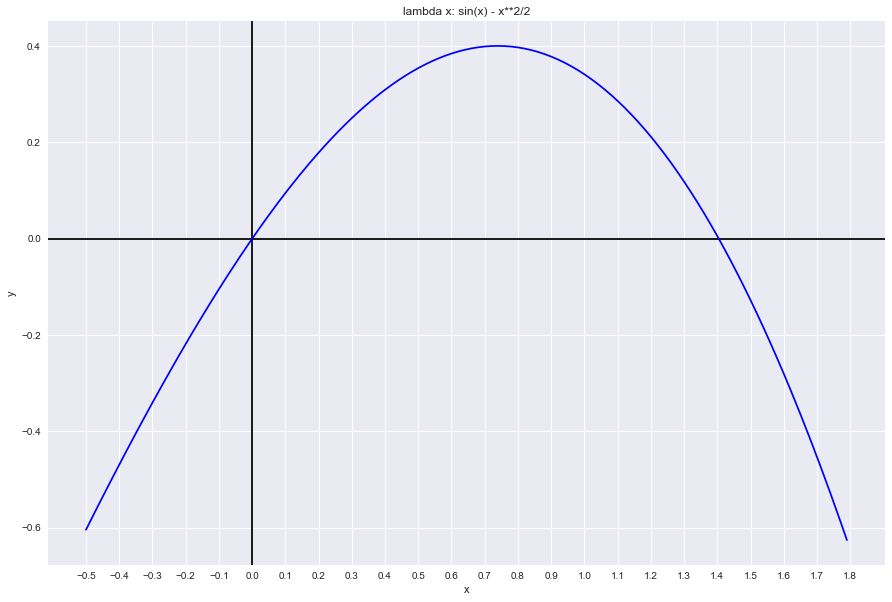

In [6]:
X = np.arange(-0.5, 1.8, 0.01)
Y = f(X)
plt.figure(figsize=(15, 10))
sns.set(style='darkgrid')
plt.title('lambda x: sin(x) - x**2/2')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-0.5, 1.81, step=0.1))
plt.plot(X, Y, color='b')

Clearly, this function has a maximum somewhere between 0.7 and 0.8.  Let us use gradient ascent to find it.  In order to do so, we have to provide the derivative of this function.  We have
$$ \frac{\mathrm{d}f}{\mathrm{d}x} = \cos(x) - x. $$

In [7]:
def fs(x):
    return np.cos(x) - x

Let us plot the derivative together with the function.

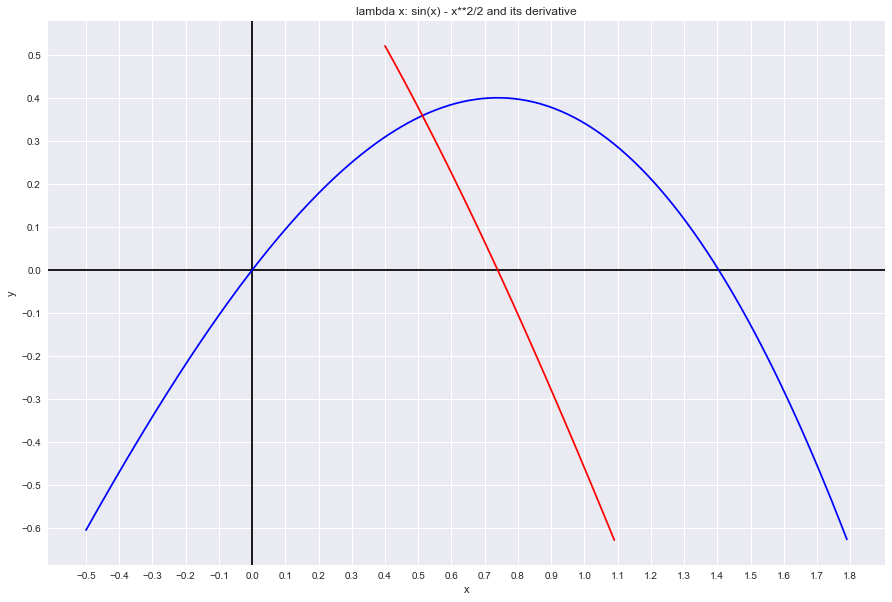

In [8]:
X2 = np.arange(0.4, 1.1, 0.01)
Ys = fs(X2)
plt.figure(figsize=(15, 10))
sns.set(style='darkgrid')
plt.title('lambda x: sin(x) - x**2/2 and its derivative')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(-0.5, 1.81, step=0.1))
plt.yticks(np.arange(-0.6, 0.61, step=0.1))
plt.plot(X, Y, color='b')
plt.plot(X2, Ys, color='r')

In [9]:
x_max, _, _ = findMaximum(f, fs, 0.8, 1e-15)

cnt = 1, f(0.6967067093471655) = 0.39899523122674585
gradient = 0.07025292254511761
incrementing: alpha = 1.2
cnt = 2, f(0.7810102164013066) = 0.3990087576712927
gradient = -0.07080750542898129
incrementing: alpha = 1.44
cnt = 3, f(0.6790474085835736) = 0.3974993381879961
gradient = 0.0991239401176165
decrementing: alpha = 0.72
cnt = 4, f(0.7300288124924401) = 0.4004200715241638
gradient = 0.015126375366808942
incrementing: alpha = 0.864
cnt = 5, f(0.7430980008093631) = 0.4004751289845323
gradient = -0.006721926997679595
incrementing: alpha = 1.0368
cnt = 6, f(0.7361287068981689) = 0.4004813012319524
gradient = 0.0049446777780313145
incrementing: alpha = 1.24416
cnt = 7, f(0.7422806772024844) = 0.4004800630509875
gradient = -0.005351870774713885
decrementing: alpha = 0.62208
cnt = 8, f(0.7392046920503266) = 0.40048860015159965
gradient = -0.00020010038689477483
incrementing: alpha = 0.7464959999999999
cnt = 9, f(0.7390553179119111) = 0.4004886113695016
gradient = 4.989892166340493e-05


In [10]:
x_max

0.7390851299493681

The maximum seems to be at $x \approx 0.739085$.  Let's check the derivative at this position.

In [11]:
fs(x_max)

5.465669583593069e-09